### Table of Content
##### [1.Loading Data](#loaddata)

[1.1Transaction Data](#transc_data)

[1.2Memeber Data](#memb_data)

[1.3User Logs](#user_log)

[2.Feature Engineering](#feature)

[3.Simple Modeling](#simplemodel)

[4.Ensemble Modeling](#ensmbmodel)

In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
trainset = pd.read_csv('data/train_v2.csv').set_index('msno')
testset =  pd.read_csv('data/sample_submission_v2.csv').set_index('msno')
testset['is_churn'] = np.nan

FileNotFoundError: File b'data/train_v2.csv' does not exist

We have about 1 million data in training set use to predict about 900 thousands data in testset. The churn rate is about 9%.

<a id='transc_data'></a>
### Load Transaction Data

In [4]:
transc1 = pd.read_csv('transactions.csv',parse_dates=['transaction_date','membership_expire_date']).set_index('msno')
train_data = pd.merge(trainset,transc1,left_index=True,right_index=True,how='left')
transc2 = pd.read_csv('transactions_v2.csv',parse_dates=['transaction_date','membership_expire_date']).set_index('msno')
transc_update = pd.concat([transc1,transc2],axis=0,ignore_index=False)
test_data = pd.merge(testset,transc_update,left_index=True,right_index=True,how='left')

In [5]:
train_data.head()

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
msno,,,,,,,,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41.0,30.0,99.0,99.0,1.0,2017-01-15,2017-02-15,0.0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41.0,30.0,99.0,99.0,1.0,2016-11-16,2016-12-15,0.0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41.0,30.0,99.0,99.0,1.0,2017-02-15,2017-03-15,0.0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41.0,30.0,99.0,99.0,1.0,2016-12-15,2017-01-15,0.0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,39.0,30.0,149.0,149.0,1.0,2016-01-31,2016-03-19,0.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15126113 entries, +++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o= to zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=
Data columns (total 9 columns):
is_churn                  int64
payment_method_id         float64
payment_plan_days         float64
plan_list_price           float64
actual_amount_paid        float64
is_auto_renew             float64
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 float64
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 1.1+ GB


In [7]:
test_data.head()

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
msno,,,,,,,,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,NaN,41,30,99,99,1,2017-01-15,2017-02-15,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,NaN,41,30,99,99,1,2016-11-16,2016-12-15,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,NaN,41,30,99,99,1,2017-02-15,2017-03-15,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,NaN,41,30,99,99,1,2016-12-15,2017-01-15,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,NaN,41,30,99,99,1,2017-03-15,2017-04-15,0


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14545180 entries, +++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o= to zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=
Data columns (total 9 columns):
is_churn                  float64
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 int64
dtypes: datetime64[ns](2), float64(1), int64(6)
memory usage: 1.1+ GB


For each member, we have multiple transaction record. We shall aggregate and find meaningful feature from these record. Possible feature include: number_of_transaction, last_transaction_date, average_transaction_seperation, cancel history(is_cancel more than 2 times), plan_changes

In the transaction history, the user might have change plan, pay different rate or even change their usage pattern (user_log_data). Before we go forward, lets see if we can find more patterns on user churned in training set.

### Missing Value in Transaction Data

In [9]:
print (train_data.isnull().sum())
print (test_data.isnull().sum())

is_churn                     0
payment_method_id         2527
payment_plan_days         2527
plan_list_price           2527
actual_amount_paid        2527
is_auto_renew             2527
transaction_date          2527
membership_expire_date    2527
is_cancel                 2527
dtype: int64
is_churn                  14545180
payment_method_id                0
payment_plan_days                0
plan_list_price                  0
actual_amount_paid               0
is_auto_renew                    0
transaction_date                 0
membership_expire_date           0
is_cancel                        0
dtype: int64


In [10]:
train_data = train_data.dropna()

The 2527 missing value might be new users that didnt have any transaction record so far. In the test set, theres no missing transaction record. We can drop these users in the training set or fill in majority. Since it just small portion of data, it won't be too much different. Here I just drop them but save the list see if we can find some information in memeber or userlogs data. Note that over 50% of these users churned.

### Transaction Counts as a feature ?

In [11]:
transc_count = train_data.reset_index().groupby('msno').transaction_date.agg(['max','min','count']).rename(index=str,columns={})
transc_count_churn = pd.concat([trainset,transc_count],axis=1)
transc_count_churn.rename(index=str,columns={'count':'transc_counts'}).transc_counts.value_counts().head()

26.0    113887
19.0     67470
22.0     56562
27.0     39544
8.0      38851
Name: transc_counts, dtype: int64

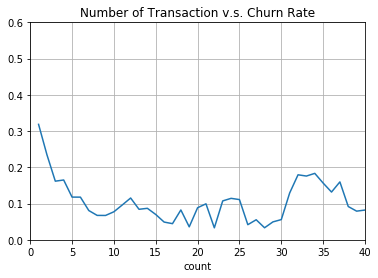

In [12]:
transc_count_churn.reset_index().groupby('count').is_churn.mean().plot()
plt.xlim(0,40)
plt.ylim(0,0.6)
plt.grid(True)
plt.title(r'Number of Transaction v.s. Churn Rate')

In [13]:
train_transc_count_cat = (transc_count.rename(index=str,columns={'count':'transc_counts'}).transc_counts
                          .map({0:'zero',1:'one',2:'two',3:'three',4:'four'})).fillna('other')

In [14]:
test_transc_count = test_data.reset_index().groupby('msno').transaction_date.agg(['max','min','count']).rename(index=str,columns={})
test_transc_count_cat = (test_transc_count.rename(index=str,columns={'count':'transc_counts'}).transc_counts
                          .map({0:'zero',1:'one',2:'two',3:'three',4:'four'})).fillna('other')

In [15]:
train_transc_count_cat.value_counts()

other    838302
one       38417
three     32330
two       30349
four      29035
Name: transc_counts, dtype: int64

In [16]:
test_transc_count_cat.value_counts()

other    780375
two       34607
one       32708
four      31468
three     28313
Name: transc_counts, dtype: int64

We see that if there are only few transaction records, these user have obvious higher chance to churn. And there is almost no different after 5 transaction records. Therefore we can create a new catagory feature 
transaction_count{0:"zero",1:"one",2:"two",3:"three",>4:"other"}

### Cancel history as a feature ?

In [17]:
cancel_history = train_data.reset_index().groupby('msno').is_cancel.sum()
cancel_history.value_counts()

0.0     767813
1.0     162078
2.0      31606
3.0       5354
4.0       1132
5.0        301
6.0         78
7.0         43
8.0         14
9.0          7
11.0         4
10.0         2
20.0         1
Name: is_cancel, dtype: int64

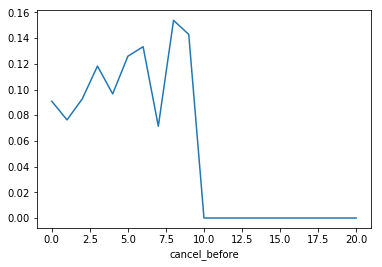

In [18]:
temp = train_data[['is_churn','is_cancel','transaction_date']].dropna().copy()
last_cancel = temp.reset_index().sort_values('transaction_date').drop_duplicates('msno',keep='last').set_index('msno')
cancel_before = pd.concat([cancel_history.rename('cancel_history'),last_cancel],axis=1)
cancel_before['cancel_before'] = (cancel_before.cancel_history-cancel_before.is_cancel)
cancel_before.reset_index().groupby('cancel_before').is_churn.mean().plot()

In [19]:
cancel_before.reset_index().groupby('is_cancel').is_churn.mean()

is_cancel
0.0    0.080996
1.0    0.650068
Name: is_churn, dtype: float64

In [20]:
threshold = 2
cancel_before['cancel_before_binary'] = np.where((cancel_before.cancel_history-cancel_before.is_cancel)>threshold,1,0)
cancel_before.reset_index().groupby('cancel_before_binary').is_churn.mean()

cancel_before_binary
0    0.088580
1    0.114759
Name: is_churn, dtype: float64

The result shows that cancel_before as a binary variable is not very useful. I will prefer to use the latest is_cancel as primary feature.

### Last transaction from now as a feature?

In [111]:
temp = train_data[['is_churn','is_cancel','transaction_date','membership_expire_date']].copy()
temp.reset_index().sort_values('transaction_date').drop_duplicates('msno',keep='last').set_index('msno').sort_values('transaction_date',ascending=True)

,is_churn,is_cancel,transaction_date,membership_expire_date
msno,,,,
z1Lm/BlRQraiaWJ7RaQWe0+l0Z40ACj7W+zk29FiaS4=,1,0.0,2015-01-02,2016-12-23
IwE/pih8PuqrY/rsnoZ/4TazDliyH9S8VWNc2/d7mJg=,1,0.0,2015-01-02,2015-10-30
6oXmSsCksxAu/tB5JxuwTPgGwKjThWwX0MygOcih7GY=,1,0.0,2015-01-05,2017-03-29
CC+1uoouPqpu4WXFuJFl8yt3LKRtFRFWe9diRD9oAos=,1,0.0,2015-01-07,2017-03-06
pP40UB0dnfU6rRpiV5jCybFAPnD8+TLrknOdqpM87Os=,1,0.0,2015-01-08,2017-03-15
KiGPG3aiCQoevOrXs7PiIbmxwEgt5u7iWipC2dW+56k=,1,0.0,2015-01-10,2017-03-15
adTjbflnpL/HDB5Oq4FiMH9dZu2Lc0y0yAd5u3QhKrQ=,1,0.0,2015-01-14,2017-03-28
8wd8VrmJyFJ4SNIo4FlaDGkavqcq08AZcJ9Ru0swUKQ=,1,0.0,2015-01-19,2015-02-18
hW1jnW+pxPH3KVycgwIARDroc7mDOLEx2WDCuQq5y08=,1,0.0,2015-01-19,2017-03-25


An interesting observation is that if the last transaction records are far from today, it seems that churn rate is higher than usual. (by definition of churn, they should've already churn months ago !) Follow this observation, we do more test to extract useful information.

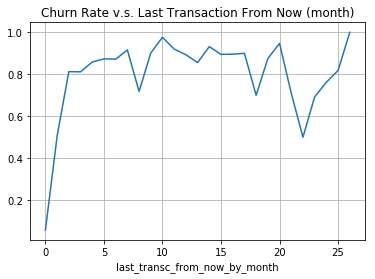

In [112]:
from datetime import datetime
train_end = datetime(year=2017,month=2,day=28)
test_end = datetime(year=2017,month=3,day=30)
temp['transc_end'] = train_end
test = temp.reset_index().sort_values(['msno','transaction_date']).drop_duplicates('msno',keep='last')
test['last_transc_from_now_by_month']=np.floor((test.transc_end-test.transaction_date).dt.days/30)
test.groupby('last_transc_from_now_by_month').is_churn.mean().plot()
plt.grid(True)
plt.title(r'Churn Rate v.s. Last Transaction From Now (month)')

In [23]:
test['last_transc_from_now_by_month'].value_counts().sort_index()

0.0     923501
1.0      15455
2.0       4223
3.0       2570
4.0       1364
5.0       5927
6.0       3536
7.0        358
8.0        305
9.0        182
10.0       214
11.0       338
12.0      4159
13.0      5398
14.0       528
15.0       152
16.0        48
17.0        20
18.0        20
19.0        16
20.0        19
21.0        31
22.0        18
23.0        13
24.0        21
25.0        11
26.0         6
Name: last_transc_from_now_by_month, dtype: int64

In [24]:
test.groupby('last_transc_from_now_by_month').is_churn.mean()

last_transc_from_now_by_month
0.0     0.057196
1.0     0.505079
2.0     0.812456
3.0     0.811673
4.0     0.858504
5.0     0.873460
6.0     0.871889
7.0     0.916201
8.0     0.718033
9.0     0.901099
10.0    0.976636
11.0    0.920118
12.0    0.893003
13.0    0.856243
14.0    0.931818
15.0    0.894737
16.0    0.895833
17.0    0.900000
18.0    0.700000
19.0    0.875000
20.0    0.947368
21.0    0.709677
22.0    0.500000
23.0    0.692308
24.0    0.761905
25.0    0.818182
26.0    1.000000
Name: is_churn, dtype: float64

We can create a feature last_trasc_from_now {0:'30days',1:'60days',2:'other'}

In [113]:
test['last_transc'] = (pd.Series(pd.cut(test['last_transc_from_now_by_month'],range(0,3,1), right=False))
                       .cat.rename_categories(['30days','60days']))
test['last_transc'] = test['last_transc'].cat.add_categories(['other'])
test['last_transc'] = test['last_transc'].fillna('other')
train_last_transc = test[['msno','last_transc']].set_index('msno')

Same transfromation on test set

In [114]:
temp = test_data[['is_churn','is_cancel','transaction_date','membership_expire_date']].copy()
test_end = datetime(year=2017,month=3,day=30)
temp['transc_end'] = test_end
test = temp.reset_index().sort_values(['msno','transaction_date']).drop_duplicates('msno',keep='last')
test['last_transc_from_now_by_month']=np.floor((test.transc_end-test.transaction_date).dt.days/30)
test['last_transc'] = (pd.Series(pd.cut(test['last_transc_from_now_by_month'],range(0,3,1), right=False))
                       .cat.rename_categories(['30days','60days']))
test['last_transc'] = test['last_transc'].cat.add_categories(['other'])
test['last_transc'] = test['last_transc'].fillna('other')
test_last_transc = test[['msno','last_transc']].set_index('msno')

### First Transaction from now/Member history

In [93]:
member_register_date = pd.read_csv('members_v3.csv',usecols=['msno','registration_init_time']\
                                   ,parse_dates=['registration_init_time']).set_index('msno')

In [94]:
temp = train_data[['is_churn','is_cancel','transaction_date','membership_expire_date']].copy()
temp = pd.merge(temp,member_register_date,how='left',left_index=True,right_index=True)

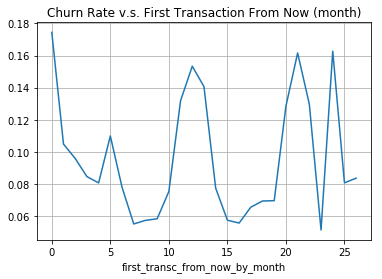

In [95]:
temp['transc_end'] = train_end
test = temp.reset_index().sort_values(['msno','transaction_date']).drop_duplicates('msno',keep='first')
test['first_transc_from_now_by_month']=np.floor((test.transc_end-test.transaction_date).dt.days/30)
test.groupby('first_transc_from_now_by_month').is_churn.mean().plot()
plt.grid(True)
plt.title(r'Churn Rate v.s. First Transaction From Now (month)')

In [30]:
test.groupby('first_transc_from_now_by_month').is_churn.agg(['count','mean'])

,count,mean
first_transc_from_now_by_month,,
0.0,32139,0.174430
1.0,23318,0.104855
2.0,25357,0.095910
3.0,24635,0.084636
4.0,21287,0.080707
5.0,19746,0.109946
6.0,28046,0.078015
7.0,32367,0.055149
8.0,25167,0.057377


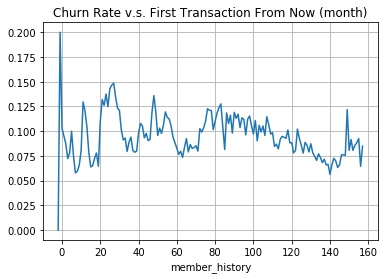

In [31]:
test['member_history'] = np.floor((test.transc_end-test.registration_init_time).dt.days/30)
test.groupby('member_history').is_churn.mean().plot()
plt.grid(True)
plt.title(r'Churn Rate v.s. First Transaction From Now (month)')

In [32]:
test.groupby('member_history').is_churn.agg(['count','mean']).head(n=12)

,count,mean
member_history,,
-2.0,1,0.000000
-1.0,5,0.200000
0.0,17882,0.103065
1.0,14645,0.094913
2.0,14948,0.087102
3.0,14323,0.072261
4.0,13115,0.078002
5.0,12232,0.099984
6.0,17194,0.075084


In terms of member history, we can define in two ways; register_init_time or first_transc_date. From the plot we can't really see significant pattern from register history. In the other hand, first transaction date v.s. churn rate we do see peaks at the first month, the sixth month and the 20th month with reasonable number of sample. In reality, it might represent for promotion periods. Therefore it might be useful to keep it as a feature.

In [98]:
temp = train_data[['is_churn','is_cancel','transaction_date','membership_expire_date']].copy()
temp['transc_end'] = train_end
test = temp.reset_index().sort_values(['msno','transaction_date']).drop_duplicates('msno',keep='first')

In [99]:
test.shape

(968433, 6)

In [96]:
test['first_transc_from_now_by_month']=np.floor((test.transc_end-test.transaction_date).dt.days/30)
train_member_history = test.reset_index()[['msno','first_transc_from_now_by_month']].set_index('msno')

In [100]:
train_member_history.shape

(968433, 1)

Same transformation for test set

In [34]:
temp = test_data[['is_churn','is_cancel','transaction_date','membership_expire_date']].copy()
test_end = datetime(year=2017,month=3,day=30)
temp['transc_end'] = test_end
test = temp.reset_index().sort_values(['msno','transaction_date']).drop_duplicates('msno',keep='first')
test['first_transc_from_now_by_month']=np.floor((test.transc_end-test.transaction_date).dt.days/30)
test_member_history = test.reset_index()[['msno','first_transc_from_now_by_month']].set_index('msno')

In [35]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))/ 10**6) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('transc_update', 4462.583194),
 ('transc1', 4226.466754),
 ('train_data', 2616.380402),
 ('test_data', 2516.316164),
 ('temp', 2050.870404),
 ('member_register_date', 1073.416901),
 ('transc2', 236.116464),
 ('test', 184.416011),
 ('last_cancel', 162.997189),
 ('transc_count', 162.997189),
 ('train_transc_count_cat', 157.688036),
 ('trainset', 147.777704),
 ('test_transc_count_cat', 147.751699),
 ('cancel_before', 144.296541),
 ('testset', 140.857403),
 ('transc_count_churn', 129.137704),
 ('test_transc_count', 113.433899),
 ('cancel_history', 105.559221),
 ('train_member_history', 105.559221),
 ('test_member_history', 98.914363),
 ('train_last_transc', 98.780458),
 ('test_last_transc', 92.562334),
 ('np', 8e-05),
 ('pd', 8e-05),
 ('plt', 8e-05),
 ('sns', 8e-05),
 ('test_end', 4.8e-05),
 ('train_end', 4.8e-05),
 ('threshold', 2.8e-05)]

In [36]:
# delete temperarory and unused object

### Payment / Discount 

In [207]:
temp = train_data[['is_churn','payment_method_id','payment_plan_days','plan_list_price','actual_amount_paid','transaction_date','is_auto_renew']].copy()
test = temp.reset_index().sort_values('transaction_date',ascending=False).drop_duplicates('msno',keep='last')

In [38]:
pd.options.display.max_rows = 999
test.groupby(['payment_plan_days','plan_list_price','is_auto_renew']).agg({'is_churn':['count','mean'],'actual_amount_paid':['min','max','mean']})

is_churn            \
                                                   count      mean   
payment_plan_days plan_list_price is_auto_renew                      
0.0               0.0             0.0               3164  0.218394   
                                  1.0              55962  0.027519   
1.0               0.0             0.0                277  0.216606   
7.0               0.0             0.0              15720  0.229389   
                  35.0            0.0                150  0.346667   
10.0              0.0             0.0                555  0.403604   
                  50.0            0.0                 25  0.280000   
14.0              0.0             0.0                205  0.356098   
                  70.0            0.0                  8  0.625000   
15.0              0.0             0.0                  1  0.000000   
21.0              0.0             0.0                 22  0.181818   
                  105.0           0.0                 12  0.583333   
30.0              0.0             0.0                 51  0.509804   
                  1.0             0.0                  2  0.000000   
                  99.0            1.0             309340  0.027892   
                  100.0           0.0                 97  0.670103   
                                  1.0              21382  0.012440   
                  119.0           0.0                 24  0.291667   
                  120.0           1.0                 75  0.426667   
                  126.0           0.0                  2  1.000000   
                  129.0           1.0              34539  0.091983   
                  134.0           1.0                282  0.074468   
                  143.0           0.0                  4  0.000000   
                  149.0           0.0              66127  0.271130   
                                  1.0             244608  0.066878   
                  150.0           0.0              18447  0.177210   
                  180.0           0.0              18835  0.246244   
                                  1.0              14752  0.086971   
                  210.0           1.0                  1  1.000000   
31.0              149.0           1.0             133488  0.062695   
35.0              149.0           0.0                 20  0.650000   
45.0              180.0           0.0                975  0.562051   
60.0              0.0             0.0                131  0.809160   
                  265.0           0.0                  4  0.500000   
                  300.0           0.0                390  0.476923   
66.0              298.0           0.0                  7  0.285714   
70.0              350.0           0.0                 37  0.486486   
80.0              400.0           0.0                 22  0.545455   
90.0              0.0             0.0                 36  0.750000   
                  1.0             0.0                 14  0.928571   
                  298.0           0.0               2856  0.161415   
                  300.0           0.0                 11  1.000000   
                  447.0           0.0                409  0.650367   
                  450.0           0.0                 89  0.460674   
                  477.0           0.0                200  0.815000   
99.0              447.0           0.0                 11  0.454545   
100.0             480.0           0.0               1937  0.528653   
                  500.0           0.0                 72  0.458333   
110.0             447.0           0.0                 12  0.833333   
120.0             0.0             0.0                 14  0.714286   
                  447.0           0.0                 47  0.851064   
                  477.0           0.0                169  0.538462   
                  596.0           0.0                  2  1.000000   
180.0             0.0             0.0                 71  0.591549   
                  536.0           0.0               2151  

In [39]:
ma = test.groupby(['actual_amount_paid']).agg({'is_churn':['count','mean'],'plan_list_price':['min','max','mean']})['is_churn','count'] > 1000
test.groupby(['actual_amount_paid']).agg({'is_churn':['count','mean'],'plan_list_price':['min','max','mean']})[ma]

is_churn           plan_list_price                     
                      count      mean             min     max         mean
actual_amount_paid                                                        
0.0                   44938  0.160020             0.0   149.0    88.317037
99.0                 309655  0.027863            99.0   149.0    99.050863
100.0                 21479  0.015410           100.0   100.0   100.000000
119.0                 32158  0.076280             0.0   149.0   148.704242
129.0                 35736  0.090049             0.0   149.0   126.530306
149.0                440153  0.089101             0.0   149.0   130.271794
150.0                 19526  0.175407             0.0   150.0   141.711052
180.0                 34562  0.187171           180.0   180.0   180.000000
298.0                  2863  0.161718           298.0   298.0   298.000000
480.0                  1950  0.528718             0.0   480.0   476.800000
536.0                  2184  0.849359             0.0   536.0   527.901099
894.0                  8631  0.447109             0.0   894.0   852.671533
1599.0                 1058  0.620038             0.0  1599.0  1541.568998
1788.0                10220  0.535910             0.0  1788.0  1738.313894

In [40]:
ma = test.groupby(['payment_plan_days']).agg({'is_churn':['count']})['is_churn','count'] > 1000
test.groupby(['payment_plan_days']).agg({'is_churn':['count','mean'],'plan_list_price':['min','max','mean']})[ma]

is_churn           plan_list_price                     
                     count      mean             min     max         mean
payment_plan_days                                                        
0.0                  59126  0.037733             0.0     0.0     0.000000
7.0                  15870  0.230498             0.0    35.0     0.330813
30.0                728568  0.076455             0.0   210.0   126.811768
31.0                133488  0.062695           149.0   149.0   149.000000
90.0                  3615  0.271646             0.0   477.0   324.391425
100.0                 2009  0.526132           480.0   500.0   480.716775
180.0                 2606  0.783193             0.0   894.0   559.467767
195.0                 8208  0.456262             0.0   894.0   886.266813
410.0                 9880  0.544130             0.0  1788.0  1773.341296

In [209]:
ma = test.groupby(['actual_amount_paid']).agg({'msno':['count']})['msno','count'] > 1000
index = test.groupby(['actual_amount_paid']).agg({'msno':['count']})[ma].index
test['actual_amount_paid_reduce'] = test['actual_amount_paid']
test.loc[~test.actual_amount_paid_reduce.isin(index),'actual_amount_paid_reduce'] = 'rare'

ma = test.groupby(['payment_plan_days']).agg({'msno':['count']})['msno','count'] > 1000
index = test.groupby(['payment_plan_days']).agg({'msno':['count']})[ma].index
test['payment_plan_days_reduce'] = test['payment_plan_days']
test.loc[~test.payment_plan_days_reduce.isin(index),'payment_plan_days_reduce'] = 'rare'
test = test.set_index('msno')
train_payment = test[['actual_amount_paid_reduce','payment_plan_days_reduce']].astype(str)

In [42]:
temp = test_data[['is_churn','payment_method_id','payment_plan_days','plan_list_price','actual_amount_paid','transaction_date','is_auto_renew']].copy()
test = temp.reset_index().sort_values('transaction_date',ascending=False).drop_duplicates('msno',keep='last')
ma = test.groupby(['actual_amount_paid']).agg({'msno':['count']})['msno','count'] > 1000
index = test.groupby(['actual_amount_paid']).agg({'msno':['count']})[ma].index
test['actual_amount_paid_reduce'] = test['actual_amount_paid']
test.loc[~test.actual_amount_paid_reduce.isin(index),'actual_amount_paid_reduce'] = 'rare'

ma = test.groupby(['payment_plan_days']).agg({'msno':['count']})['msno','count'] > 1000
index = test.groupby(['payment_plan_days']).agg({'msno':['count']})[ma].index
test['payment_plan_days_reduce'] = test['actual_amount_paid']
test.loc[~test.payment_plan_days_reduce.isin(index),'payment_plan_days_reduce'] = 'rare'
test = test.set_index('msno')
test_payment = test[['payment_plan_days_reduce','actual_amount_paid_reduce']].astype(str)

The payment plan, list price and actual_amount_paid is very messy due to complicate plans and discount. From the official website, we know the basic and the majority plan is 30days for 149. For students discounts it becomes 30days/99 plus dozens of credit card discount and coupon make it more complicate. Also, there are some obvious error data in actual amount paid. For example, someone has paid $1788 for 0 days plan, what does that even mean?

We have several strategies,

First, ignore everything and come back to see if we really need extra features.

Second, including everything. Let the classifiers make their decission and leave it in the black box.

Third, make simpler model to create new features.

### Load Member data

In [43]:
train_test_set = pd.concat([trainset,testset],axis=0)

In [44]:
train_test_set.shape

(1878431, 1)

In [45]:
train_test_set.head()

,is_churn
msno,
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1.0
f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1.0
zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1.0
8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1.0
K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1.0


In [46]:
member = pd.read_csv('members_v3.csv',parse_dates=['registration_init_time'],index_col='msno')
member.head()

,city,bd,gender,registered_via,registration_init_time
msno,,,,,
Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [47]:
train_test_set_member = pd.merge(train_test_set,member, how='left',left_index=True, right_index=True)
train_test_set_member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878431 entries, +++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o= to zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=
Data columns (total 6 columns):
is_churn                  float64
city                      float64
bd                        float64
gender                    object
registered_via            float64
registration_init_time    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 100.3+ MB


### Missing Value

In [48]:
train_test_set_member.isnull().sum()

is_churn                   907471
city                       222374
bd                         222374
gender                    1171277
registered_via             222374
registration_init_time     222374
dtype: int64

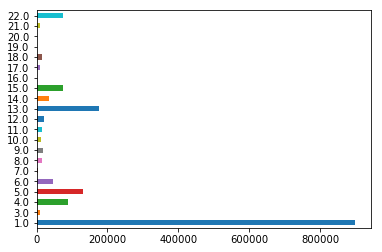

In [49]:
train_test_set_member.city.value_counts().sort_index().plot(kind='barh')

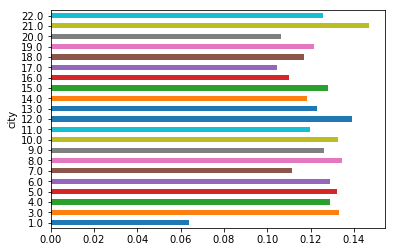

In [50]:
train_test_set_member.groupby('city').is_churn.mean().plot(kind='barh')

In [51]:
train_test_set_member.loc[train_test_set_member.city.isnull(),'city'] = 1.0

The majority users are in City 1 (most likely to be Taipei), therefore we simply fillin 1.0

In [52]:
train_test_set_member.loc[(train_test_set_member.bd > 100) | (train_test_set_member.bd<=0),'bd'] = np.nan

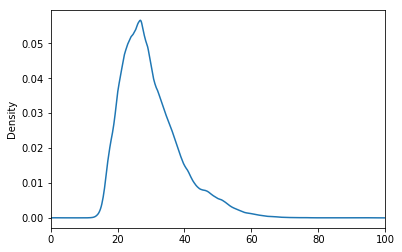

In [53]:
train_test_set_member.bd.plot(kind = 'kde', xlim=[0,100])

It seems to be a guassian disturbution. We can fit and fill in randan gaussian

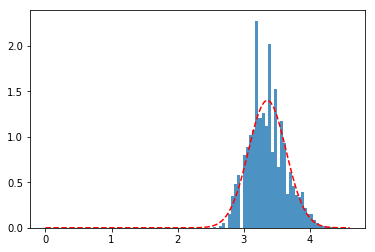

In [54]:
from scipy.stats import norm
import matplotlib.mlab as mlab
(mu, sigma) = norm.fit(np.log(train_test_set_member.bd.dropna()))
n,bins,patches = plt.hist(np.log(train_test_set_member.bd.dropna()),100,normed=1,alpha=0.8)
y = mlab.normpdf(bins,mu,sigma)
l = plt.plot(bins,y,'r--')

In [55]:
train_test_set_member.loc[train_test_set_member.bd.isnull(),'bd'] = np.exp(np.random.normal(loc=mu,scale=sigma,size=train_test_set_member.bd.isnull().sum()))

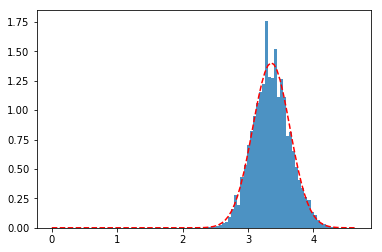

In [56]:
n,bins,patches = plt.hist(np.log(train_test_set_member.bd),100,normed=1,alpha=0.8)
y = mlab.normpdf(bins,mu,sigma)
l = plt.plot(bins,y,'r--')

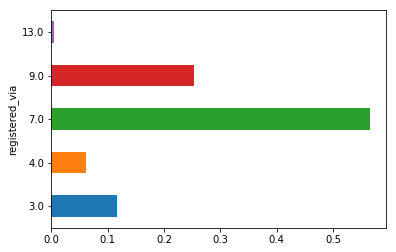

In [57]:
(((train_test_set_member.reset_index().groupby(['registered_via'])
   .msno.count().sort_index())/(~train_test_set_member.registered_via.isnull()).sum()).plot(kind='barh'))

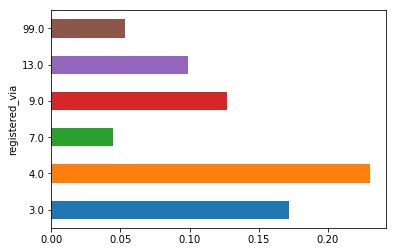

In [58]:
test = train_test_set_member.copy()
test.loc[test.registered_via.isnull(),'registered_via'] = 99.0
test.reset_index().groupby(['registered_via']).is_churn.mean().sort_index().plot(kind='barh')

In [126]:
train_test_set_member.loc[train_test_set_member.registered_via.isnull(),'registered_via'] = 7.0

In [127]:
train_test_set_member.registered_via.isnull().sum()

0

The majority of user register via method 7.0, and the missing value has similar churn rate with method 7. Therefore fill in 7.0 on missing value will be reasonable and safe.

In [61]:
train_test_set_member.gender.isnull().sum()

1171277

## Gender

over 50% of users do not have gender information.

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


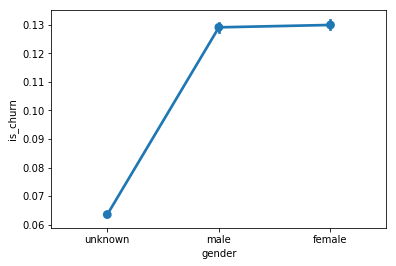

In [62]:
test = train_test_set_member.copy()
test['gender'] = test.gender.fillna('unknown')
sns.pointplot(x="gender", y="is_churn", data=test);

Use random forest to predict and fill in missing gender.

In [63]:
test_transc = transc_update.reset_index().sort_values('transaction_date').drop_duplicates('msno',keep='last').copy()
test_transc.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
18341529,pB/gEZLLQzVKNeL3g4YcsuOy0zAJLWc+5PF8eCzsMV0=,40,31,149,149,1,2015-01-01,2015-01-13,1
2974724,Bz8CJzoki91X1TcQ1KWw+C4eN8D/LX/jFbY+She8OpU=,22,410,1788,1788,0,2015-01-01,2016-02-15,0
20559110,peIh6gf/elxR1aPxB9nBid5nRl7nyhNbOhwdkFFgpUk=,38,195,894,894,0,2015-01-01,2015-07-15,0
12186977,CCp/c7eZRFCjtsxhjAIcmBW9ZS23wWOshePFruK7YJQ=,37,31,149,149,1,2015-01-01,2015-01-02,1
17939995,iPouemATmAhizPSdTtchNcy3qFAog9lAAdsl2WrmIKM=,37,31,149,149,1,2015-01-01,2015-01-01,1


In [64]:
test_transc = transc_update.reset_index().sort_values('transaction_date',ascending=False).drop_duplicates('msno',keep='first').copy()
test_transc.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
22054203,nlwI4rVeDrFDFjkHBXuMBBXAWvhTv9miDiEGdaMDiXs=,41,30,99,99,1,2017-03-31,2017-05-01,0
21856662,GOKnXKY9XXaf3PaL9seD4HENmWw3o5WFUKTKL2irFrA=,39,30,149,149,1,2017-03-31,2017-05-05,0
22903976,TJ6nxPb8NDfeKb8HpZz2HemVvZHZdS52OJdMYFCZHv4=,41,30,99,99,1,2017-03-31,2017-04-30,0
21741515,9NwzFDrPGKgEuLKrM7EXsqg+VtebHhJ5WJFDOWhY4bQ=,41,30,99,99,1,2017-03-31,2017-04-30,0
22903980,TM/4vR23dnG79lZCqimPzRLBCq6RlG3ibOqs1Wd9IgY=,34,30,149,149,1,2017-03-31,2017-04-30,0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cols1 = ['city','bd','gender','registered_via']
cols2 = ['payment_method_id','is_auto_renew','is_cancel']
cat_cols = ['city','registered_via','payment_method_id','is_auto_renew','is_cancel']
gender_rf = pd.merge(train_test_set_member[cols1],\
                        test_transc.set_index('msno')[cols2]\
                        ,left_index=True,right_index=True,how='left')
for col in cat_cols:
    dummies = pd.get_dummies(gender_rf[col],prefix=col)
    gender_rf = pd.concat([gender_rf,dummies],axis=1)
    gender_rf = gender_rf.drop(columns=col)
gender_train = gender_rf[~gender_rf.gender.isnull()]
gender_target = gender_rf[gender_rf.gender.isnull()]
gender_train['male'] = gender_train.gender.map({'male':1,"female":0})

def age_rescale(bd):
    return (np.log(bd)-mu)/sigma
gender_train['age_rescale']=gender_train.bd.map(age_rescale)
gender_target['age_rescale']=gender_target.bd.map(age_rescale)

gender_train_set = gender_train.drop(columns=['bd','gender'],inplace=False)
gender_target_set = gender_train.drop(columns=['bd','gender'],inplace=False)

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [66]:
from sklearn.model_selection import StratifiedKFold
import time
start = time.time()
kfold = StratifiedKFold(n_splits=3)
Y = gender_train_set.male.values
X = gender_train_set.drop(columns=['male']).values
print ('Random Forest Classifier')
forest_clf = RandomForestClassifier(random_state=42,max_features=None)
kfold = StratifiedKFold(n_splits=10)
cv = cross_val_score(forest_clf, X, Y, cv=3, scoring="accuracy", n_jobs=-1)
end = time.time()
time_eclapse = end-start
print (cv)
print (time_eclapse)

Random Forest Classifier
[ 0.53302873  0.53086739  0.53153146]
134.8266429901123


Using random forest classifier with city/age/transactions features to predict missing value is not very useful (The little experiments shows somewhat garbage-in garbage-out rule) .With this huge amount of missing value in gender, I would rather leave it unknown.

In [67]:
train_test_set_member.loc[train_test_set_member.gender.isnull(),'gender'] = 'unknown'

### User Logs

### Feature Review

In [210]:
# train_transc_count_cat/train_last_transc/train_member_history/train_payment
# is_cancel/is_auto_renew
# city/bd/register_via/gender
feature_list = [train_transc_count_cat,train_last_transc,train_member_history,train_payment]
training_feature = pd.concat([trainset,train_transc_count_cat,train_last_transc,train_member_history,train_payment],axis=1)
training_feature = training_feature.dropna()
training_feature = pd.merge(training_feature,\
                            transc1[['is_cancel','is_auto_renew']].reset_index().drop_duplicates('msno',keep='first').set_index('msno')\
                            ,how='left',left_index=True,right_index=True)
training_feature = pd.merge(training_feature,train_test_set_member.loc[~train_test_set_member.is_churn.isnull(),['city','bd','gender','registered_via']]\
                ,how='left',left_index=True,right_index=True)

In [211]:
training_feature.reset_index().rename(index=str,columns={'index':'msno'}).to_csv('feature_v1.csv',index=False)

### Feature Analysis

In [219]:
training_feature.head()

,is_churn,transc_counts,last_transc,first_transc_from_now_by_month,actual_amount_paid_reduce,payment_plan_days_reduce,is_cancel,is_auto_renew,city,bd,gender,registered_via
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,four,30days,3.0,99.0,30.0,0,1,1.0,24.084485,unknown,7.0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,other,30days,25.0,149.0,31.0,0,1,15.0,26.000000,male,9.0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,other,30days,25.0,149.0,30.0,0,1,1.0,29.727061,unknown,7.0
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,other,30days,11.0,149.0,30.0,0,1,18.0,21.000000,male,7.0
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,other,30days,25.0,149.0,31.0,0,1,22.0,32.000000,male,9.0


In [212]:
#age
training_feature[['is_churn','bd']].corr()

,is_churn,bd
is_churn,1.000000,-0.042576
bd,-0.042576,1.000000


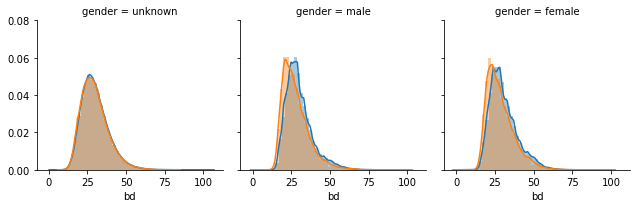

In [250]:
g = sns.FacetGrid(training_feature, hue = 'is_churn',col='gender')
g = g.map(sns.distplot, "bd")
g.set(ylim=(0, 0.08))

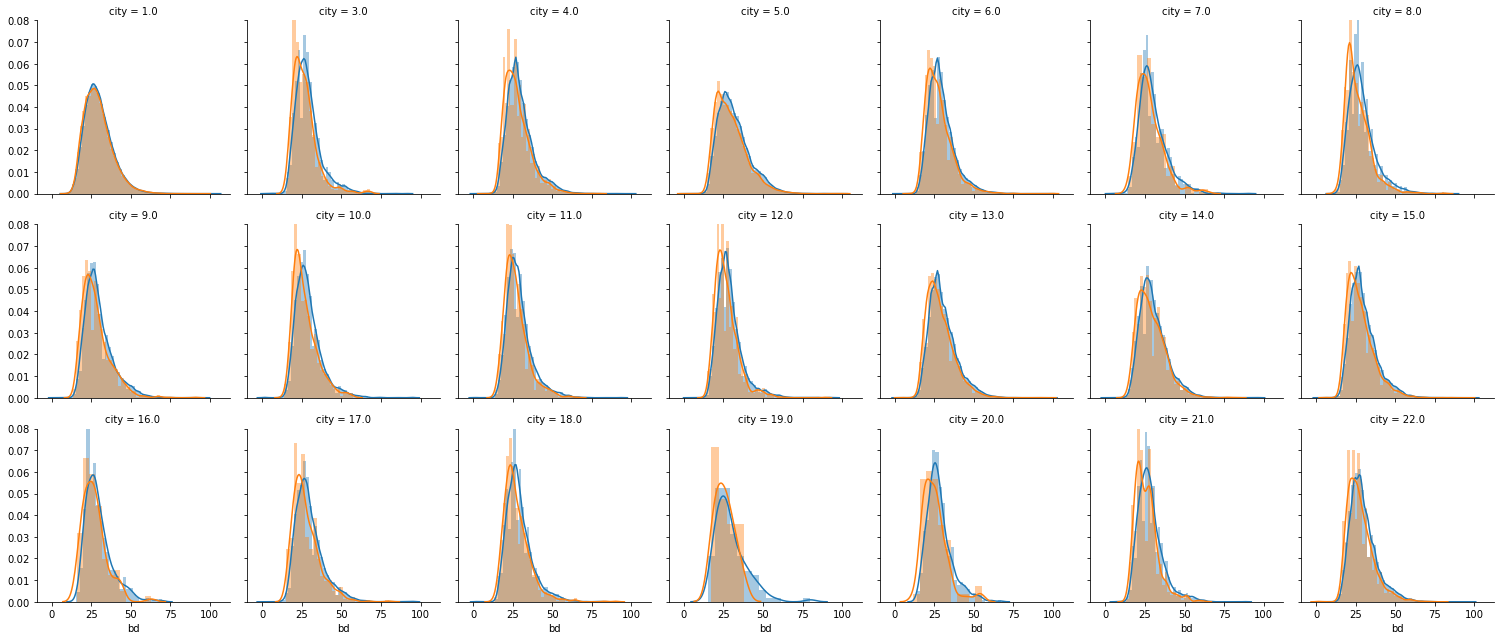

In [240]:
g = sns.FacetGrid(training_feature, hue = 'is_churn',col='city',col_wrap=7, size=3)
g = g.map(sns.distplot, "bd")
g.set(ylim=(0, 0.08))

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


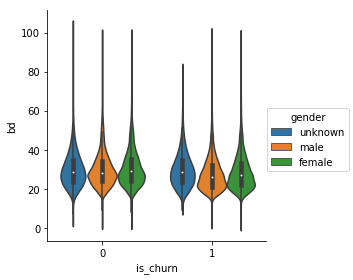

In [228]:
g = sns.factorplot(x="is_churn", y="bd", hue="gender",data=training_feature, kind="violin")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


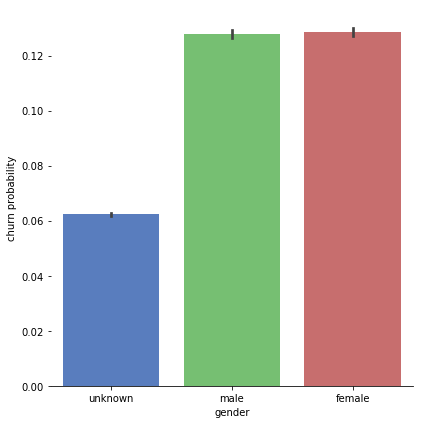

In [248]:
# not much differents between genders, but those unknown are significant lower
g = sns.factorplot(x="gender",y="is_churn",data=training_feature,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


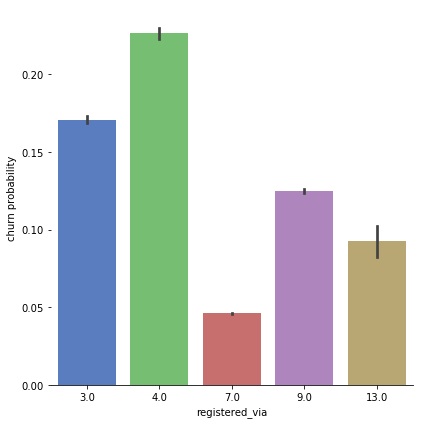

In [245]:
g = sns.factorplot(x="registered_via",y="is_churn",data=training_feature,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


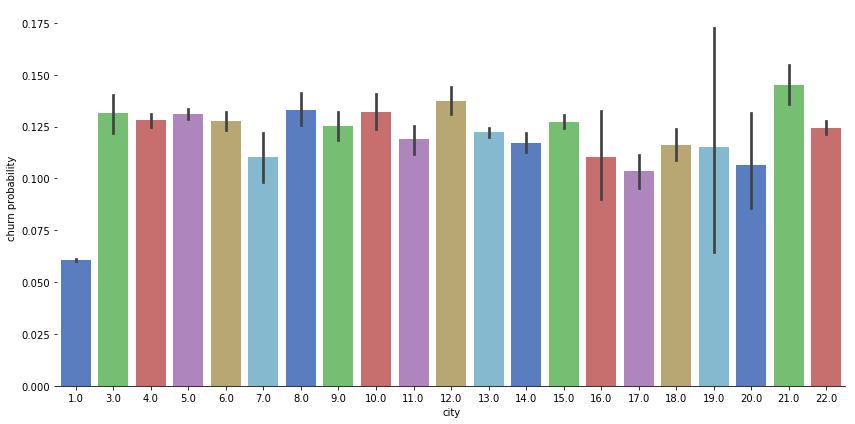

In [247]:
# City might not be a good feautre, we can use just 1 and not 1 to reduce dimensionality
g = sns.factorplot(x="city",y="is_churn",data=training_feature,kind="bar", size = 6 , aspect=2, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


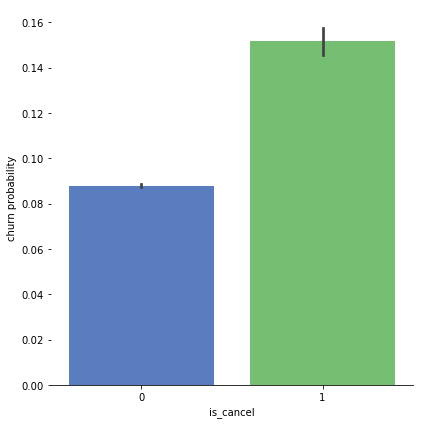

In [217]:
g = sns.factorplot(x="is_cancel",y="is_churn",data=training_feature,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


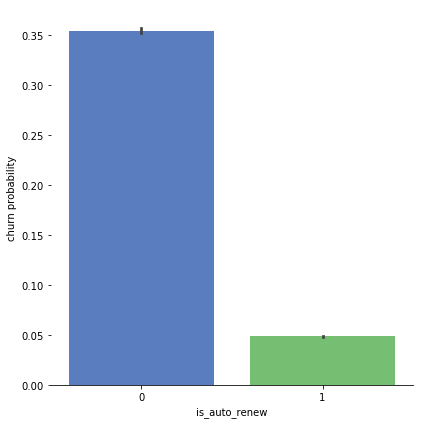

In [218]:
g = sns.factorplot(x="is_auto_renew",y="is_churn",data=training_feature,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


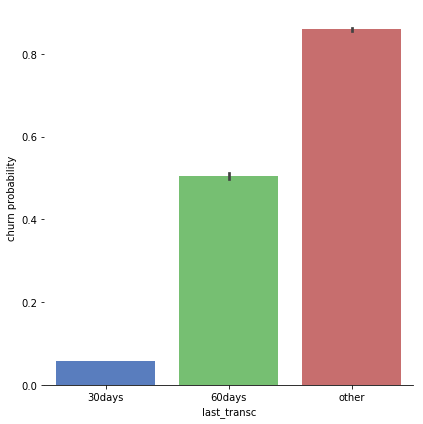

In [227]:
g = sns.factorplot(x="last_transc",y="is_churn",data=training_feature,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


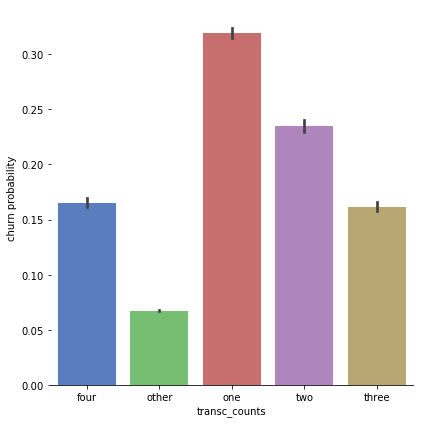

In [226]:
g = sns.factorplot(x="transc_counts",y="is_churn",data=training_feature,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


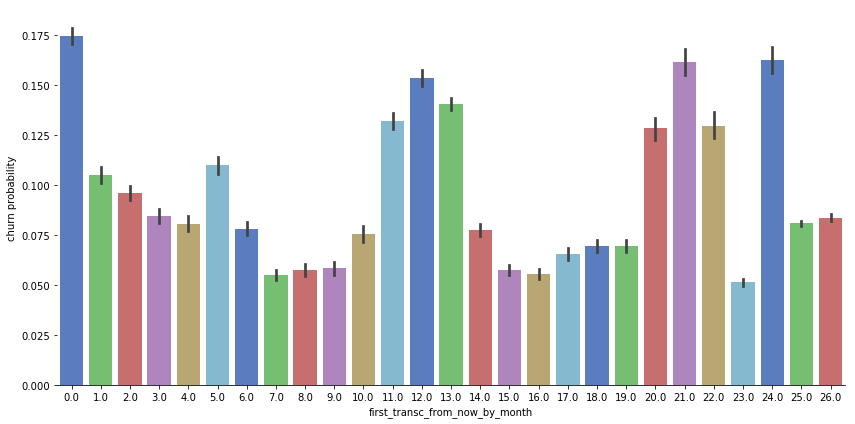

In [242]:
# its an ambigious feature since we dont know the churn rate are affected by the user in specific 
# epoch or a general pattern of user behavior over time. I hope to be the latter but we can experiment
g = sns.factorplot(x="first_transc_from_now_by_month",y="is_churn",data=training_feature,kind="bar", size = 6, aspect=2 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


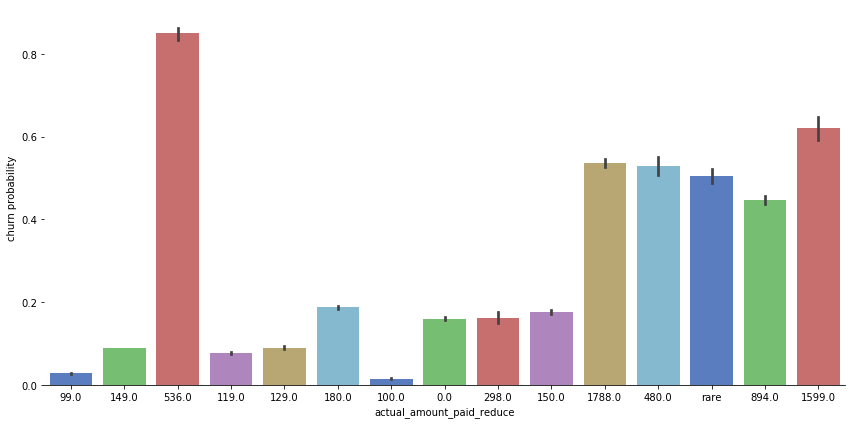

In [243]:
g = sns.factorplot(x="actual_amount_paid_reduce",y="is_churn",data=training_feature,kind="bar", size = 6, aspect=2 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


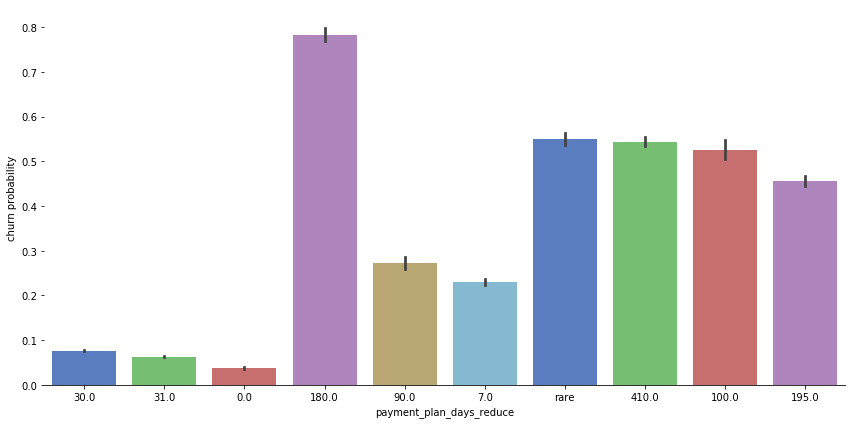

In [244]:
g = sns.factorplot(x="payment_plan_days_reduce",y="is_churn",data=training_feature,kind="bar", size = 6, aspect=2 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("churn probability")

### Encodeing

In [269]:
training_feature.head()

,is_churn,transc_counts,last_transc,first_transc_from_now_by_month,actual_amount_paid_reduce,payment_plan_days_reduce,is_cancel,is_auto_renew,city,bd,gender,registered_via
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,four,30days,3.0,99.0,30.0,0,1,1.0,24.084485,unknown,7.0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,other,30days,25.0,149.0,31.0,0,1,15.0,26.000000,male,9.0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,other,30days,25.0,149.0,30.0,0,1,1.0,29.727061,unknown,7.0
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,other,30days,11.0,149.0,30.0,0,1,18.0,21.000000,male,7.0
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,other,30days,25.0,149.0,31.0,0,1,22.0,32.000000,male,9.0


In [289]:
#one-hot encoding
encode_cols = ['is_cancel','is_auto_renew','gender','city','registered_via','transc_counts','last_transc','first_transc_from_now_by_month','actual_amount_paid_reduce','payment_plan_days_reduce']
X = training_feature.bd.copy()
for col in encode_cols:
    f = pd.get_dummies(training_feature[col],prefix=col)
    X = pd.concat([X,f],axis=1)
Y_train = training_feature.is_churn.values
X_train = X.values

In [304]:
#Y_mean = np.ones(len(Y_train))*training_feature.is_churn.mean()
Y_mean = np.ones(len(Y_train))*0.088
def log_loss(Y,Y_mean):
    n = len(Y)
    return -1./n*(Y*np.log(Y_mean)+(1-Y)*np.log(1-Y_mean)).sum()
log_loss(Y_train,Y_mean)

0.29963866051548094

### Modeling

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
training_feature = pd.read_csv('feature_v1.csv')

In [4]:
encode_cols = ['is_cancel','is_auto_renew','gender','city','registered_via','transc_counts','last_transc','first_transc_from_now_by_month','actual_amount_paid_reduce','payment_plan_days_reduce']
X = training_feature.bd.copy()
for col in encode_cols:
    f = pd.get_dummies(training_feature[col],prefix=col)
    X = pd.concat([X,f],axis=1)
Y_train = training_feature.is_churn.values
X_train = X.values

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
kfold = StratifiedKFold(n_splits=3)
RF_clf = RandomForestClassifier(random_state=2)
cv = cross_val_score(RF_clf, X_train, y = Y_train, scoring = "neg_log_loss", cv = kfold, n_jobs=-1)
cv

array([-1.15982296, -1.14226116, -1.14538602])

In [7]:
import time
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

kfold = StratifiedKFold(n_splits=3)

random_state = 2
classifiers = []
#classifiers.append(SVC(random_state=random_state))
#classifiers.append(DecisionTreeClassifier(random_state=random_state))
#classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
#classifiers.append(RandomForestClassifier(random_state=random_state))
#classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
#classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

start = time.time()
cv_results = []
for classifier in classifiers :
    c_start = time.time()
    print (classifier)
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "neg_log_loss", cv = kfold, n_jobs=-1))
    c_time = time.time()-c_start
    print ('time: {:f}'.format(c_time))
tot_time = time.time()-start
print ('total_time: {:f}'.format(tot_time))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)
time: 418.178785
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
time: 431.638215
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_interc

/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


time: 17.079946
total_time: 881.981680


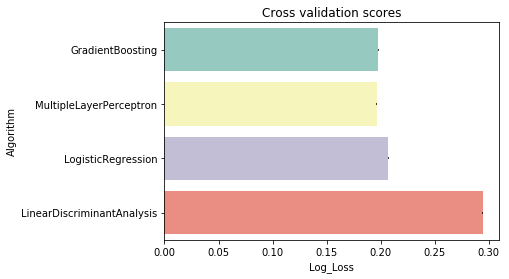

In [10]:
cv_res = pd.DataFrame({"CrossValMeans":[-cv for cv in cv_means],"CrossValerrors": cv_std,\
                       "Algorithm":["GradientBoosting","MultipleLayerPerceptron","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Log_Loss")
g = g.set_title("Cross validation scores")

### Turning Meta Parameter of Estimator

In [11]:
kfold = StratifiedKFold(n_splits=10)
LGR = LogisticRegression()
LGR_param_grid = {'penalty' : ["l2"],
              'C' : [1e-3,1e-2,1e-1,1,10,1e2,1e3],
              'tol': [1e-5],
              'max_iter': [100,300],
              }

gsLGR = GridSearchCV(LGR,param_grid = LGR_param_grid, cv=kfold, scoring="neg_log_loss", n_jobs= -1, verbose = 1)

gsLGR.fit(X_train,Y_train)

LGR_best = gsLGR.best_estimator_

# Best score
gsLGR.best_score_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  3.5min finished


-0.2069851588752455

In [28]:
print (gsLGR.best_estimator_)
print (gsLGR.best_score_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)
-0.2069851588752455


In [14]:
kfold = StratifiedKFold(n_splits=3)
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [200,300],
              'learning_rate': [0.1,0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_log_loss", n_jobs= -1, verbose = 10)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 110.8min finished


-0.19541896381676263

In [25]:
print (gsGBC.best_estimator_)
print (gsMLPC.best_score_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=150, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
-0.19656416009801186


In [21]:
kfold = StratifiedKFold(n_splits=3)
MLPC = MLPClassifier()
mlpc_param_grid = {'hidden_layer_sizes':[(200,),(200,200),(200,100,50)],
                   'activation':['relu','tanh'],
                   'alpha':[0.0001,0.01],
                   'learning_rate_init':[0.001],
                   'max_iter':[500],
                   'tol':[1e-4],
                   'early_stopping':[True]
              }

gsMLPC = GridSearchCV(MLPC,param_grid = mlpc_param_grid, cv=kfold, scoring="neg_log_loss", n_jobs= -1, verbose = 5)

gsMLPC.fit(X_train,Y_train)

MLPC_best = gsMLPC.best_estimator_

# Best score
gsMLPC.best_score_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200,), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200,), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200,), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV] activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=

[Parallel(n_jobs=-1)]: Done   5 out of  36 | elapsed: 31.1min remaining: 193.0min


[CV] activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.1986684421869638, total=32.1min
[CV] activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19768623866301718, total=31.3min
[CV] activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200,), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19768637397824368, total=29.2min
[CV] activation=tanh, alph

[Parallel(n_jobs=-1)]: Done  13 out of  36 | elapsed: 43.5min remaining: 77.0min


[CV] activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200,), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19644274006133514, total=46.3min
[CV] activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19682624904472387, total=48.5min
[CV] activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.1967121559571254, total=53.2min
[CV] activation=tanh, alpha=0.

[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed: 67.5min remaining: 48.2min


[CV]  activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200,), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19715000002084854, total=33.9min
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19712968524870847, total=37.0min
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19700966121123192, total=48.2min
[CV]  activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19903207062847733, total=27.7min
[CV]  activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.20211916755364231, total=24.8min
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100,

[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed: 75.4min remaining: 18.2min


[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19672888990238652, total=74.1min
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19657332694778398, total=46.3min
[CV]  activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19632123159853732, total=78.7min
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19736728314410235, total=60.7min
[CV]  activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500, tol=0.0001, score=-0.19570983105424844, total=59.8min
[CV]  activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(200

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 79.6min finished


-0.19656416009801186

In [26]:
print (gsMLPC.best_estimator_)
print (gsMLPC.best_score_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
-0.19656416009801186


### Learning Curve

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_log_loss', verbose = 1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[learning_curve] Training set sizes: [ 64562 209826 355091 500356 645621]
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV

[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.6min remaining: 12.7min


[CV] ..................... , score=-0.19660615892756356, total= 5.8min
[CV] ..................... , score=-0.19678021098290416, total= 5.8min
[CV] ..................... , score=-0.19602950646130213, total= 8.1min
[CV] ..................... , score=-0.19569263863534114, total=10.5min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 10.8min remaining:  9.4min


[CV] ..................... , score=-0.19658107988248963, total=11.1min
[CV] ..................... , score=-0.19618623729520282, total=12.5min
[CV] ..................... , score=-0.19540032107874705, total=15.1min
[CV] ..................... , score=-0.19561851651416448, total=16.2min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 16.6min remaining:  4.1min


[CV] ..................... , score=-0.19581754951490113, total=16.9min
[CV] ..................... , score=-0.19548803243187857, total=19.9min
[CV] ..................... , score=-0.19505025941435075, total=20.1min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 20.4min finished


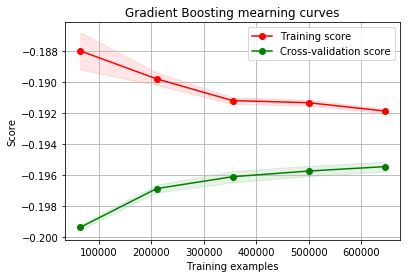

In [20]:
g = plot_learning_curve(gsGBC.best_estimator_,"Gradient Boosting mearning curves",X_train,Y_train,cv=kfold)

[learning_curve] Training set sizes: [ 64562 209826 355091 500356 645621]
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ..................... , score=-0.19940307591157366, total= 1.0min
[CV

[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.7min remaining:  7.5min


[CV] ...................... , score=-0.1987019983332787, total= 2.8min
[CV] ....................... , score=-0.197298546368858, total= 3.8min
[CV] ..................... , score=-0.19870528269026302, total= 4.1min
[CV] ..................... , score=-0.19924831873325638, total= 3.7min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  5.0min remaining:  4.4min


[CV] ..................... , score=-0.19897786007737656, total= 4.5min
[CV] ..................... , score=-0.19826510336570094, total= 5.1min
[CV] ..................... , score=-0.19686693260395505, total= 6.7min
[CV] ..................... , score=-0.19640430164481718, total= 6.5min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  7.1min remaining:  1.8min


[CV] ..................... , score=-0.19622253524138658, total= 7.5min
[CV] ..................... , score=-0.19745300095040474, total= 8.8min
[CV] ..................... , score=-0.19626392709839163, total= 7.6min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.2min finished


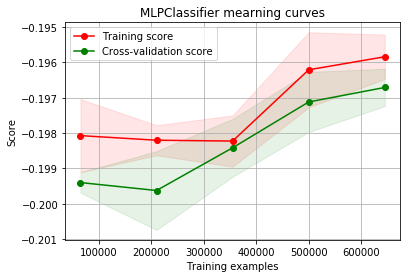

In [27]:
gMLP = plot_learning_curve(gsMLPC.best_estimator_,"MLPClassifier mearning curves",X_train,Y_train,cv=kfold)

[learning_curve] Training set sizes: [ 64562 209826 355091 500356 645621]


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   27.9s finished


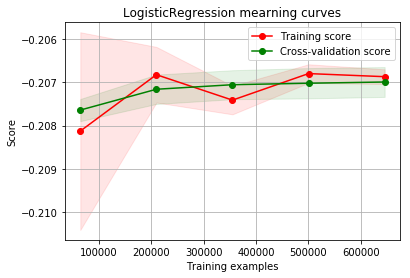

In [30]:
gLGR = plot_learning_curve(gsLGR.best_estimator_,"LogisticRegression mearning curves",X_train,Y_train,cv=kfold)

### Feature Importance

Multiple Layer Classifier (Neuron Netword) and LogisticRegression don't have feature importance attribute. So lets see the Gradient Boosting

Text(0.5,1,'Gradient Boosting feature importance')

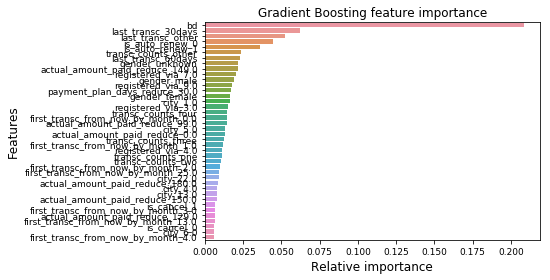

In [36]:
indices = np.argsort(GBC_best.feature_importances_)[::-1][:40]
g = sns.barplot(y=X.columns[indices][:40],x = GBC_best.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Gradient Boosting feature importance")

### Ensemble Estimator

In [38]:
votingC = VotingClassifier(estimators=[('MLP', MLPC_best), ('GBC', GBC_best),
('LGR', LGR_best)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_train, Y_train)

In [56]:
test = votingC.predict_proba(X_train)
def log_loss(Y,Y_mean):
    n = len(Y)
    return -1./n*(Y*np.log(Y_mean)+(1-Y)*np.log(1-Y_mean)).sum()
log_loss(Y_train,test[:,1])

0.19648023514944768

In [42]:
import pickle
filename = 'vote_v1.sav'
pickle.dump(votingC, open(filename, 'wb'))

In [60]:
model =  pickle.load(open(filename, 'rb'))

### Prediction